### Генерация синтетических данных

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [12]:
# Установим seed для воспроизводимости
np.random.seed(42)

In [13]:
# Параметры распределений
n_control = 1000  # Размер контрольной группы
n_test = 1000  # Размер тестовой группы

# Предположим, что средний чек и стандартное отклонение до внедрения системы для обеих групп одинаковы
mean = 500  # Средний чек
std = 15  # Стандартное отклонение

In [14]:
# Генерация данных
control_before = np.random.normal(loc=mean, scale=std, size=n_control)
test_before = np.random.normal(loc=mean, scale=std, size=n_test)

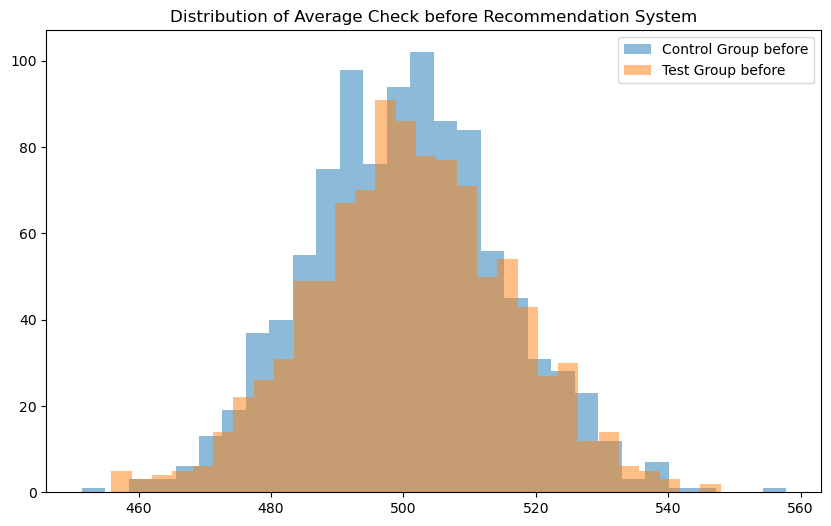

In [15]:
# Визуализация данных
plt.figure(figsize=(10, 6))
plt.hist(control_before, bins=30, alpha=0.5, label='Control Group before')
plt.hist(test_before, bins=30, alpha=0.5, label='Test Group before')
plt.title('Distribution of Average Check before Recommendation System')
plt.legend()
plt.show()

### Внедрение рекомендательной системы

In [16]:
# Предположим, что внедрение рекомендательной системы в тестовой группе привело
# к увеличению среднего чека на 10 условных единиц
mean_after = mean + 10

control_after = np.random.normal(loc=mean, scale=std, size=n_control)
test_after = np.random.normal(loc=mean_after, scale=std, size=n_test)

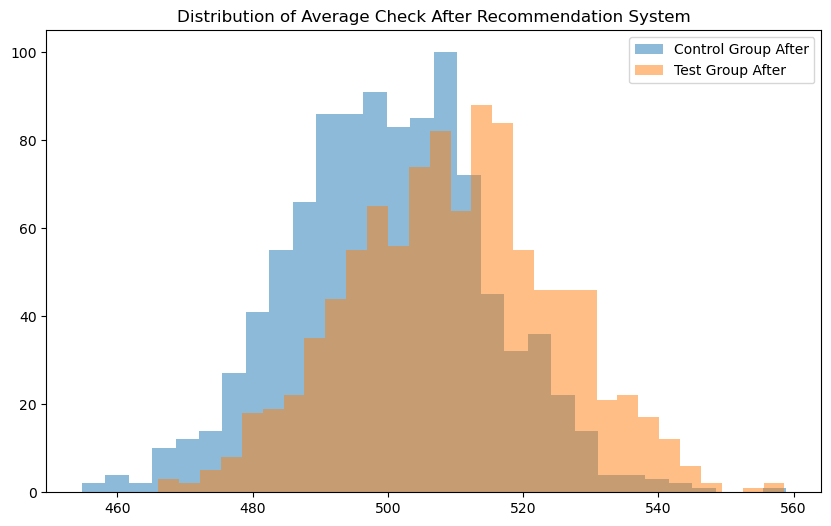

In [17]:
# Визуализация данных
plt.figure(figsize=(10, 6))
plt.hist(control_after, bins=30, alpha=0.5, label='Control Group After')
plt.hist(test_after, bins=30, alpha=0.5, label='Test Group After')
plt.title('Distribution of Average Check After Recommendation System')
plt.legend()
plt.show()

### Анализ результатов

In [18]:
# Проведение t-теста для проверки гипотезы о равенстве средних значений
t_stat, p_value = stats.ttest_ind(test_after, control_after)

In [19]:
print(f't-статистика: {t_stat:.2f}')
print(f'p-значение: {p_value:.6f}')

t-статистика: 14.28
p-значение: 0.000000


In [20]:
# Интерпретация результатов
alpha = 0.05 # Зададим уровень значимости

if p_value < alpha:
    print('Отвергаем нулевую гипотезу. Есть статистически значимые различия в среднем чеке между контрольной и тестовой группами.')
    print('Внедрение рекомендательной системы, вероятно, повлияло на средний чек клиентов.')
else:
    print('Не отвергаем нулевую гипотезу. Нет статистически значимых различий в среднем чеке между контрольной и тестовой группами.')
    print('Внедрение рекомендательной системы, вероятно, не оказало значительного влияния на средний чек клиентов.')

Отвергаем нулевую гипотезу. Есть статистически значимые различия в среднем чеке между контрольной и тестовой группами.
Внедрение рекомендательной системы, вероятно, повлияло на средний чек клиентов.


### Обоснование выбранного метода

Был выбран **t-тест Стьюдента для независимых выборок**, поскольку:
- Мы сравниваем средние значения двух независимых групп (контрольной и тестовой) после проведения эксперимента.
- Выборки считаются нормальными (что подтверждается генерацией данных через нормальное распределение).
- Тест проверяет нулевую гипотезу о том, что средние значения двух групп равны, против альтернативной гипотезы, что они различаются.